# Desafio CIS-IEEE


Importar dependências e ler arquivo de entrada.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_drugs = pd.read_csv('./Drugs.csv')

In [3]:
df_drugs.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Income (USD),Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,NaN,-0.67825,1.93886,1.43533,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,NaN,-0.46725,0.80523,-0.84732,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,NaN,-0.14882,-0.80615,-0.01928,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,NaN,0.73545,-1.63340,-0.45174,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,NaN,-0.67825,-0.30033,-1.55521,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


Importações feitas e dataframe definido

## Respostas

### 1. No dataset existem alguns valores faltantes. Antes de começar a manipular os dados, trate essas informações e descreva sucintamente as alterações feitas.

In [4]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1884 non-null   int64  
 1   Age           1884 non-null   object 
 2   Gender        1880 non-null   object 
 3   Education     1881 non-null   object 
 4   Country       1883 non-null   object 
 5   Ethnicity     1882 non-null   object 
 6   Income (USD)  23 non-null     float64
 7   Nscore        1880 non-null   float64
 8   Escore        1881 non-null   float64
 9   Oscore        1881 non-null   float64
 10  AScore        1880 non-null   float64
 11  Cscore        1879 non-null   float64
 12  Impulsive     1881 non-null   object 
 13  SS            1877 non-null   float64
 14  Alcohol       1881 non-null   object 
 15  Amphet        1882 non-null   object 
 16  Amyl          1882 non-null   object 
 17  Benzos        1882 non-null   object 
 18  Caff          1880 non-null 

In [5]:
df_drugs.isna().sum()

ID                 0
Age                0
Gender             4
Education          3
Country            1
Ethnicity          2
Income (USD)    1861
Nscore             4
Escore             3
Oscore             3
AScore             4
Cscore             5
Impulsive          3
SS                 7
Alcohol            3
Amphet             2
Amyl               2
Benzos             2
Caff               4
Cannabis           1
Choc               2
Coke               1
Crack              1
Ecstasy            0
Heroin             0
Ketamine           0
Legalh             0
LSD                0
Meth               0
Mushrooms          0
Nicotine           0
Semer              0
VSA                0
dtype: int64

É possível identificar que existem valores faltantes no dataset. O caso mais crítico é a coluna "Income (USD)". Primeiro trocarei o nome da coluna para facilitar a manipulação dos dados.

In [6]:
# Altera o nome da coluna para Income
df_drugs.rename(columns={'Income (USD)': 'Income'},inplace='True')

Vamos analisar os valores faltantes nas colunas e identificar os casos mais críticos.

In [7]:
# Quantas linhas tem pelo menos uma coluna com valor ausente
df_drugs[df_drugs.isna().any(axis=1)]

,ID,Age,Gender,Education,Country,Ethnicity,Income,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,NaN,-0.67825,1.93886,1.43533,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,NaN,-0.46725,0.80523,-0.84732,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,NaN,-0.14882,-0.80615,-0.01928,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,NaN,0.73545,-1.63340,-0.45174,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,NaN,-0.67825,-0.30033,-1.55521,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1882,18-24,M,University degree,Canada,White,NaN,-0.05188,-1.76250,0.88309,...,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1878,1883,18-24,M,"Some college or university, no certificate or ...",Other,NaN,NaN,-0.79151,0.32197,0.29338,...,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,NaN,-1.19430,1.74091,1.88511,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,NaN,-0.24649,1.74091,0.58331,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0


In [8]:
# Mostra a quantidade de valores faltantes na coluna Income (crítico)
df_drugs.Income.isna().sum()

np.int64(1861)

Existem duas possíveis abordagens para tratar os valores faltantes:
- Preencher os valores faltantes com a média dos valores existentes
- Remover linhas que possuam valores faltantes.
- Excluir os valores ausentes e desconsiderar a coluna

Para as colunas com poucos valores ausentes (<10) optei por remover as poucas linhas com valores faltantes. Para as colunas com muitos valores ausentes (>10) optei por excluir a coluna.

Primeiro vou tratar a coluna Income que possui muitos valores faltantes. Nesse caso, devido a quantidade alta de valores faltantes (proxima da quantidade total de linhas) é interessante desconsiderar a coluna.

In [9]:
df_drugs.drop(columns=['Income'],axis=1, inplace=True)

Agora para os outros valores ausentes que aparecem em poucos casos, podemos ou remover as linhas ou preencher com a média dos valores existentes. Vou optar por remover as linhas, visto que são muitas colunas que possuem valores faltantes.

In [10]:
df_drugs.dropna(axis=0, inplace=True)

Como passamos de 1862 linhas para 1853 linhas (redução de 0.4%), é possivel considerar a remoção das linhas com valores faltantes uma abordagem válida. Em casos onde muitas linhas foram removidas, seria interessante substituir os valores pela média.

In [11]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1853 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1853 non-null   int64  
 1   Age        1853 non-null   object 
 2   Gender     1853 non-null   object 
 3   Education  1853 non-null   object 
 4   Country    1853 non-null   object 
 5   Ethnicity  1853 non-null   object 
 6   Nscore     1853 non-null   float64
 7   Escore     1853 non-null   float64
 8   Oscore     1853 non-null   float64
 9   AScore     1853 non-null   float64
 10  Cscore     1853 non-null   float64
 11  Impulsive  1853 non-null   object 
 12  SS         1853 non-null   float64
 13  Alcohol    1853 non-null   object 
 14  Amphet     1853 non-null   object 
 15  Amyl       1853 non-null   object 
 16  Benzos     1853 non-null   object 
 17  Caff       1853 non-null   object 
 18  Cannabis   1853 non-null   object 
 19  Choc       1853 non-null   object 
 20  Coke       18

### 2. Qual é a distribuição da idade dos indivíduos na amostra? Existem diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias?

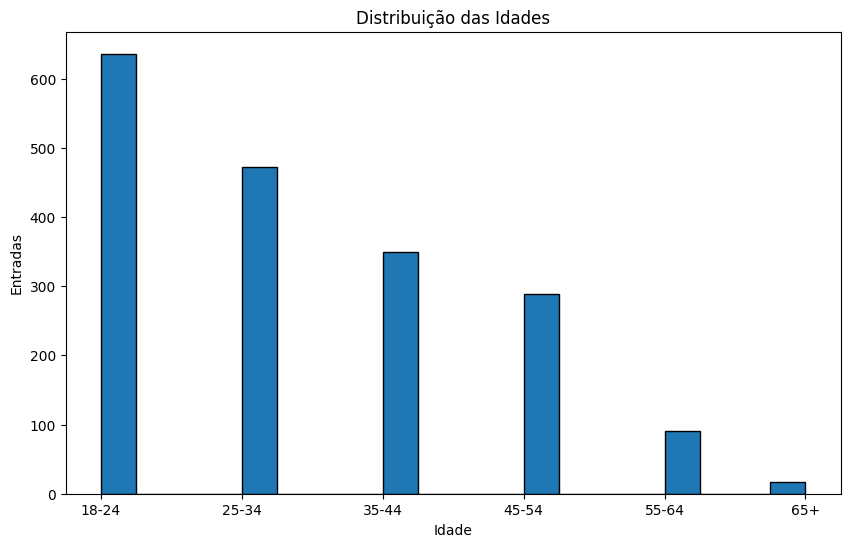

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_drugs.sort_values(by='Age')['Age'], bins=20, edgecolor='black')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Entradas')
plt.show()


In [49]:
# Importar seaborn para utilizar o grafico estilo boxplot
import seaborn as sns

Para uma análise exploratória dos dados, vou agregar as categorias de uso para melhor visualizar as diferenças nas faixas etárias predominantes por catégoria. CL6 a CL3 foram agregados em uso recente ou 'Usou no Último Ano'. CL2 e CL1 foram agregados uso distante ou 'Usou Mais de Uma Década Atrás ou Últimos Dez Anos'. 

In [44]:
# Lista de susbtancias
substancias = df_drugs.columns[13:30]

mapeamento_uso = {
    'CL0': 'Nunca Usou',
    'CL1': 'Usou Mais de Uma Década Atrás ou Últimos Dez Anos',
    'CL2': 'Usou Mais de Uma Década Atrás ou Últimos Dez Anos',
    'CL3': 'Usou no Último Ano',
    'CL4': 'Usou no Último Ano',
    'CL5': 'Usou no Último Ano',
    'CL6': 'Usou no Último Ano'
}

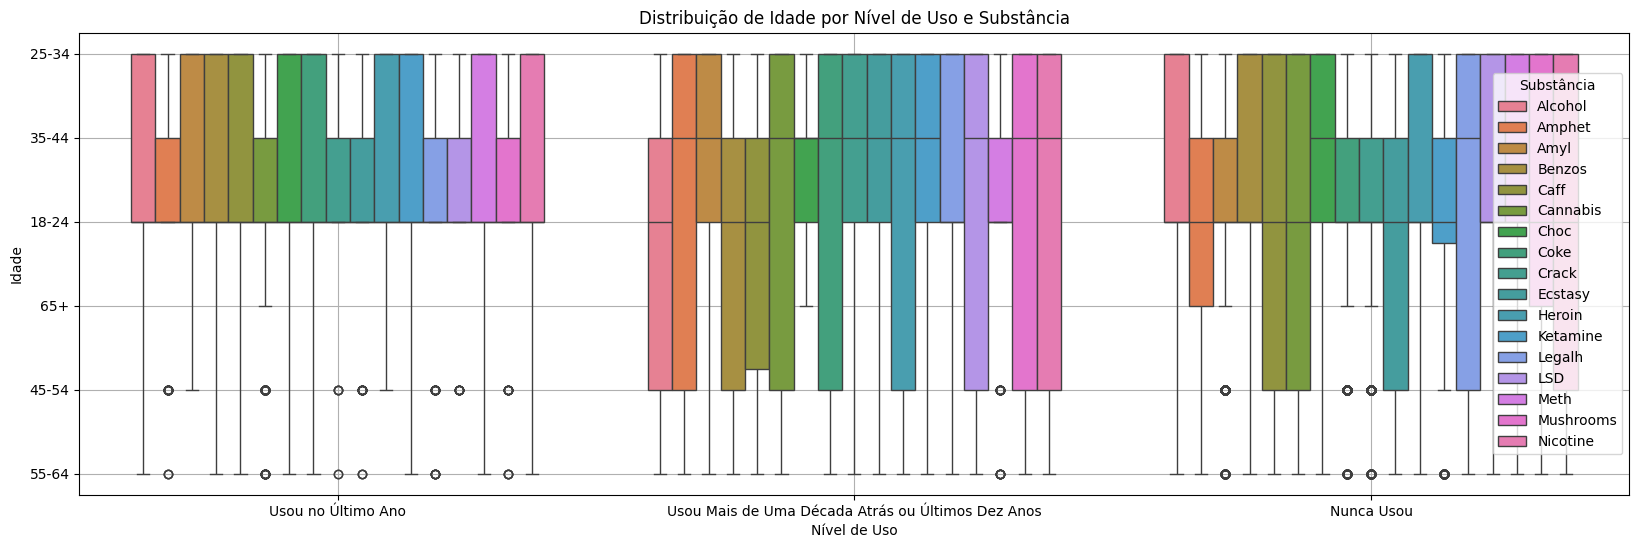

In [48]:
# Transforma as colunas em linhas
df_melted = df_drugs.melt(id_vars=['Age'], value_vars=substancias, var_name='substancia', value_name='uso')

for substancia in substancias:
    df_drugs[substancia] = df_drugs[substancia].replace(mapeamento_uso)

plt.figure(figsize=(20, 6))
sns.boxplot(x='uso', y='Age', hue='substancia', data=df_melted)
plt.title('Distribuição de Idade por Nível de Uso e Substância')
plt.xlabel('Nível de Uso')
plt.ylabel('Idade')
plt.legend(title='Substância')
plt.grid(True)
plt.show()

O gráfico mostra que há diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias. O álcool e o café são amplamente consumidos em todas as faixas etárias, enquanto o uso de cannabis e tabaco/nicotina é mais comum entre os jovens e adultos jovens. Substâncias ilícitas como heroína, crack e metanfetaminas têm uso muito baixo em todas as faixas etárias, especialmente entre os mais velhos

Jovens (18-24 anos):
- Mais Utilizadas: Álcool, Cannabis, Tabaco/Nicotina, Café.
- Menos Utilizadas: Substâncias como Heroína, Crack, e Meth têm uso muito baixo.

Jovem Adultos (25-44 anos):
- Mais Utilizadas: Álcool, Cannabis, Tabaco/Nicotina, Café.
- Menos Utilizadas: Substâncias ilícitas como Heroína, Crack, e Meth têm uso baixo.

Adultos (45+ anos):
- Mais Utilizadas: Álcool, Café.
- Menos Utilizadas: Cannabis, Tabaco/Nicotina, e substâncias ilícitas têm uso muito baixo.